In [1]:
from time import time

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='paper', style='whitegrid', color_codes=True, font_scale=1.8)
colorcycle = [(0.498, 0.788, 0.498),
              (0.745, 0.682, 0.831),
              (0.992, 0.753, 0.525),
              (0.220, 0.424, 0.690),
              (0.749, 0.357, 0.090),
              (1.000, 1.000, 0.600),
              (0.941, 0.008, 0.498),
              (0.400, 0.400, 0.400)]
sns.set_palette(colorcycle)
mpl.rcParams['figure.max_open_warning'] = 65
mpl.rcParams['figure.figsize'] = [12, 7]

In [2]:
%run alpha3.py

In [3]:
# Load questionaire
ua        = loaders.Useralias()
qdf       = pd.read_json('../../allan_data/RGender_.json')
qdf.index = qdf.index.map(lambda x: ua[x])


In [4]:
datafile = datafiles[1][0]
G_org = nx.read_edgelist(datafile, create_using=nx.DiGraph())
G_org.remove_edges_from(G_org.selfloop_edges())  # This should be done alreaddy?
G = graph.nxDiGraph2Graph(G_org).to_directed()  # w_ij != w_ji, so the graph need to be directed

In [5]:
q, g, entries_kept = get_aligned_data(qdf.gender, G)

In [6]:
entries_kept

1.0

In [7]:
sorted(g.nodes) == sorted(q.index.tolist())

True

In [8]:
len(q.index.tolist() )

766

In [9]:
alpha = np.linspace(0, 2, 201)
alpha

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44, 0.45,
       0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68,
       0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91,
       0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14,
       1.15, 1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37,
       1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.5

In [10]:
t0 = time()
set_w_ij_sms_call(g, alpha)
t1 = time()
print(f"Calculating and setting w_ij for {g.number_of_edges()} edges took { '{:.2f}'.format(t1 - t0)} seconds.")

Calculating and setting w_ij for 4694 edges took 1.86 seconds.


In [11]:
t0 = time()
q_mean = get_q_mean(g, q)
t1 = time()
print(f"Calculating q_mean for {len(q.index)} users took { '{:.2f}'.format(t1 - t0)} seconds.")

Calculating q_mean for 766 users took 3.78 seconds.


In [12]:
q_mean

alpha
0.00    0.238857
0.01    0.238825
0.02    0.238795
0.03    0.238768
0.04    0.238744
0.05    0.238721
0.06    0.238701
0.07    0.238684
0.08    0.238669
0.09    0.238656
0.10    0.238646
0.11    0.238638
0.12    0.238632
0.13    0.238629
0.14    0.238628
0.15    0.238629
0.16    0.238632
0.17    0.238637
0.18    0.238645
0.19    0.238654
0.20    0.238665
0.21    0.238678
0.22    0.238693
0.23    0.238710
0.24    0.238728
0.25    0.238748
0.26    0.238770
          ...   
1.74    0.241681
1.75    0.241676
1.76    0.241671
1.77    0.241666
1.78    0.241661
1.79    0.241656
1.80    0.241650
1.81    0.241645
1.82    0.241640
1.83    0.241634
1.84    0.241628
1.85    0.241622
1.86    0.241617
1.87    0.241611
1.88    0.241605
1.89    0.241599
1.90    0.241592
1.91    0.241586
1.92    0.241580
1.93    0.241573
1.94    0.241567
1.95    0.241561
1.96    0.241554
1.97    0.241547
1.98    0.241541
1.99    0.241534
2.00    0.241527
Name: u0550, Length: 201, dtype: float64

In [13]:
t0 = time()
s_sq, t_sq, r = get_s2_t2_r(g, q, q_mean)
t1 = time()
print(f"Calculating s_sq, t_sq and r for {len(q.index)} users took { '{:.2f}'.format(t1 - t0)} seconds.")

Calculating s_sq, t_sq and r for 766 users took 11.18 seconds.


In [14]:
s_sq

alpha
0.00    0.181804
0.01    0.181788
0.02    0.181772
0.03    0.181758
0.04    0.181745
0.05    0.181733
0.06    0.181723
0.07    0.181714
0.08    0.181706
0.09    0.181699
0.10    0.181694
0.11    0.181690
0.12    0.181687
0.13    0.181685
0.14    0.181685
0.15    0.181685
0.16    0.181687
0.17    0.181689
0.18    0.181693
0.19    0.181698
0.20    0.181704
0.21    0.181711
0.22    0.181719
0.23    0.181728
0.24    0.181737
0.25    0.181748
0.26    0.181759
          ...   
1.74    0.183271
1.75    0.183269
1.76    0.183266
1.77    0.183264
1.78    0.183261
1.79    0.183258
1.80    0.183256
1.81    0.183253
1.82    0.183250
1.83    0.183247
1.84    0.183244
1.85    0.183241
1.86    0.183238
1.87    0.183235
1.88    0.183232
1.89    0.183229
1.90    0.183226
1.91    0.183222
1.92    0.183219
1.93    0.183216
1.94    0.183212
1.95    0.183209
1.96    0.183206
1.97    0.183202
1.98    0.183199
1.99    0.183195
2.00    0.183192
Name: u0550, Length: 201, dtype: float64

In [15]:
t_sq

alpha
0.00    0.022543
0.01    0.022603
0.02    0.022662
0.03    0.022721
0.04    0.022779
0.05    0.022837
0.06    0.022895
0.07    0.022953
0.08    0.023010
0.09    0.023067
0.10    0.023123
0.11    0.023179
0.12    0.023234
0.13    0.023288
0.14    0.023342
0.15    0.023396
0.16    0.023449
0.17    0.023501
0.18    0.023553
0.19    0.023604
0.20    0.023654
0.21    0.023704
0.22    0.023753
0.23    0.023802
0.24    0.023850
0.25    0.023897
0.26    0.023944
          ...   
1.74    0.028483
1.75    0.028496
1.76    0.028508
1.77    0.028520
1.78    0.028532
1.79    0.028543
1.80    0.028555
1.81    0.028566
1.82    0.028577
1.83    0.028588
1.84    0.028598
1.85    0.028609
1.86    0.028619
1.87    0.028629
1.88    0.028639
1.89    0.028649
1.90    0.028659
1.91    0.028668
1.92    0.028678
1.93    0.028687
1.94    0.028696
1.95    0.028705
1.96    0.028713
1.97    0.028722
1.98    0.028730
1.99    0.028739
2.00    0.028747
Name: u0550, Length: 201, dtype: float64

In [16]:
r

alpha
0.00    0.123997
0.01    0.124335
0.02    0.124671
0.03    0.125004
0.04    0.125335
0.05    0.125664
0.06    0.125990
0.07    0.126313
0.08    0.126633
0.09    0.126949
0.10    0.127263
0.11    0.127572
0.12    0.127878
0.13    0.128180
0.14    0.128478
0.15    0.128772
0.16    0.129062
0.17    0.129348
0.18    0.129630
0.19    0.129907
0.20    0.130180
0.21    0.130450
0.22    0.130715
0.23    0.130976
0.24    0.131232
0.25    0.131485
0.26    0.131734
          ...   
1.74    0.155416
1.75    0.155486
1.76    0.155554
1.77    0.155622
1.78    0.155688
1.79    0.155754
1.80    0.155819
1.81    0.155882
1.82    0.155945
1.83    0.156007
1.84    0.156067
1.85    0.156127
1.86    0.156186
1.87    0.156244
1.88    0.156301
1.89    0.156357
1.90    0.156413
1.91    0.156467
1.92    0.156521
1.93    0.156574
1.94    0.156626
1.95    0.156677
1.96    0.156727
1.97    0.156777
1.98    0.156826
1.99    0.156874
2.00    0.156921
Name: u0550, Length: 201, dtype: float64

Text(0.5,1,'q_mean')

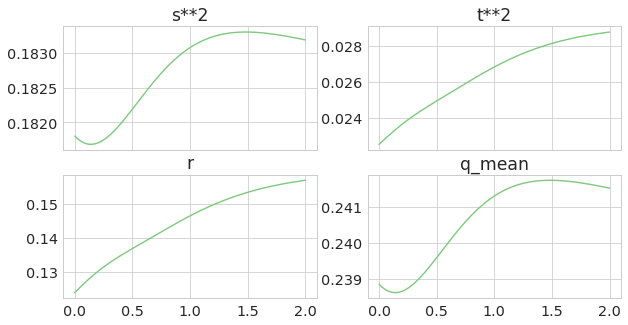

In [17]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 5), sharex=True)
ax1.plot(alpha, s_sq)
ax1.set_title("s**2")
ax2.plot(alpha, t_sq)
ax2.set_title("t**2")
ax3.plot(alpha, r)
ax3.set_title("r")
ax4.plot(alpha, q_mean)
ax4.set_title("q_mean")

Check that $w_{ij} \neq w_{ji}$

In [18]:
u, v = 'u0175', 'u0201'
assert (g[u][v]['w_ij'] != g[v][u]['w_ij']).mean() >= 1 - 1/len(alpha)

# Bluetooth

In [19]:
datafile = datafiles[0][0]
G_org = nx.read_edgelist(datafile, create_using=nx.DiGraph())
G_org.remove_edges_from(G_org.selfloop_edges())  # This should be done alreaddy?
G = graph.nxDiGraph2Graph(G_org)

In [20]:
q, g, entries_kept = get_aligned_data(qdf.gender, G)